<a href="https://colab.research.google.com/github/abcardoso/ifes_ann/blob/main/IMDB_HuggingFace_Transormer_AnaB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tarefa da disciplina Redes Neurais Artificiais - IFES 2024 01

Professor Francisco Boldt
Aluna Ana B. Cardoso


Installing pre requirements

In [1]:
pip install transformers datasets


IMDB dataset

In [2]:
import tarfile
import os
import urllib.request

url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
file_name = "aclImdb_v1.tar.gz"
data_folder = "aclImdb"

# Download the dataset
urllib.request.urlretrieve(url, file_name)

# Extract the dataset
if not os.path.exists(data_folder):
    with tarfile.open(file_name, "r:gz") as tar:
        tar.extractall()


Load IMDB dataset

In [3]:
from datasets import load_dataset
# Load the IMDB dataset
def load_imdb_data(data_dir):
    train_texts, train_labels = [], []
    for label in ["pos", "neg"]:
        train_dir = os.path.join(data_dir, "train", label)
        for file_name in os.listdir(train_dir):
            with open(os.path.join(train_dir, file_name), "r", encoding="utf-8") as file:
                train_texts.append(file.read())
                train_labels.append(1 if label == "pos" else 0)
    return train_texts, train_labels

train_texts, train_labels = load_imdb_data("aclImdb")

# Truncate texts to fit the model's maximum token length
max_length = 512
train_texts = [text[:max_length] for text in train_texts]


Pipeline - Sentimento

In [4]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")



No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Analise de sentimento

In [5]:
results = sentiment_pipeline(train_texts[:5000])  # Exemplos com 5000 primeiros textos
for text, result in zip(train_texts[:5000], results):
    print(f"Text: {text[:50]}...")
    print(f"Sentiment: {result['label']}, Score: {result['score']}")

A saída de streaming foi truncada nas últimas 5000 linhas.
Text: I gave this movie such a high mark because it was ...
Sentiment: POSITIVE, Score: 0.9997904896736145
Text: Has there ever been a movie more charming than thi...
Sentiment: POSITIVE, Score: 0.9995974898338318
Text: One of the first of the best musicals, Anchors Awe...
Sentiment: POSITIVE, Score: 0.9936309456825256
Text: This film is one of Michael Keaton's best. Through...
Sentiment: POSITIVE, Score: 0.9998842477798462
Text: Sure this was a remake of a 70's film, but it had ...
Sentiment: NEGATIVE, Score: 0.8286398649215698
Text: Out of all the Princess stories Disney has put out...
Sentiment: POSITIVE, Score: 0.9993454813957214
Text: A number of contributors have mentioned the age di...
Sentiment: POSITIVE, Score: 0.9939098358154297
Text: I've seen this movie at theater when it first came...
Sentiment: POSITIVE, Score: 0.9979420304298401
Text: Who the hell rests at night whilst walking in the ...
Sentiment: NEGATIVE, Scor

Métricas para avaliar o modelo


Total texts analyzed: 5000
Positive sentiments: 4003 (80.06%)
Negative sentiments: 997 (19.94%)
Average confidence score: 0.97


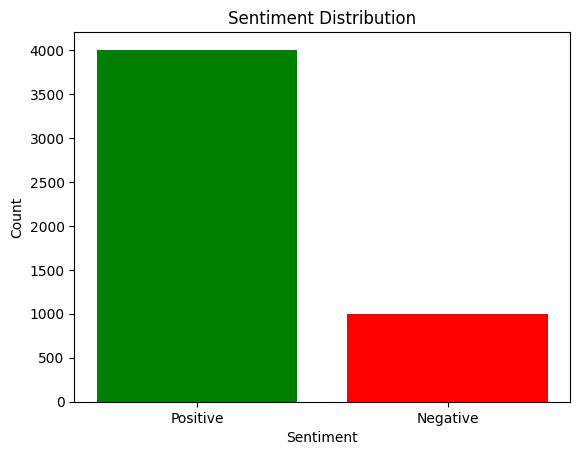

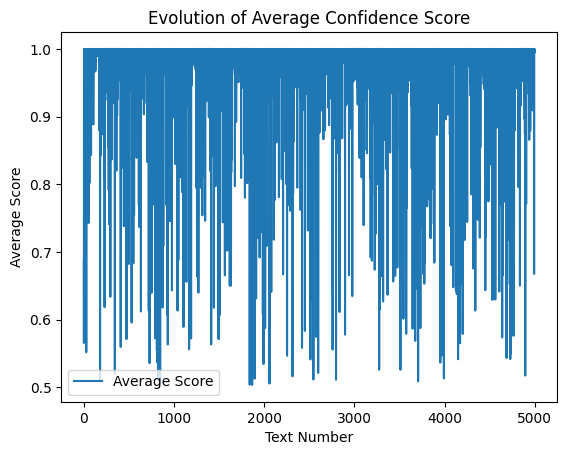

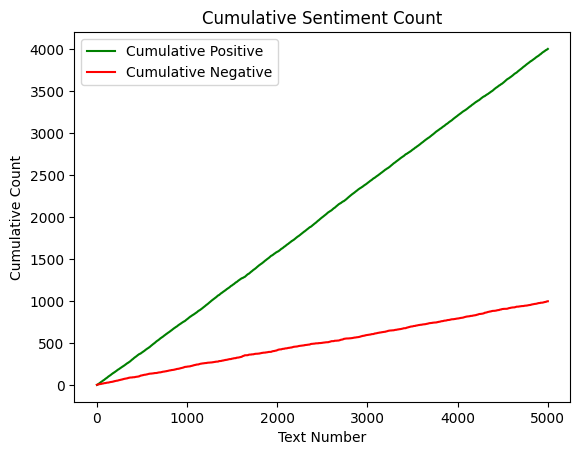

In [7]:
import matplotlib.pyplot as plt

# Calcula metrica
positive_count = sum(1 for result in results if result['label'] == 'POSITIVE')
negative_count = sum(1 for result in results if result['label'] == 'NEGATIVE')
total = len(results)
positive_percentage = (positive_count / total) * 100
negative_percentage = (negative_count / total) * 100
average_score = sum(result['score'] for result in results) / total

print(f"\nTotal texts analyzed: {total}")
print(f"Positive sentiments: {positive_count} ({positive_percentage:.2f}%)")
print(f"Negative sentiments: {negative_count} ({negative_percentage:.2f}%)")
print(f"Average confidence score: {average_score:.2f}")


# Plot
labels = ['Positive', 'Negative']
counts = [positive_count, negative_count]

plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

# Visual
average_scores = []
positive_counts = []
negative_counts = []
cumulative_positive = 0
cumulative_negative = 0

for i, result in enumerate(results):
    cumulative_positive += 1 if result['label'] == 'POSITIVE' else 0
    cumulative_negative += 1 if result['label'] == 'NEGATIVE' else 0
    positive_counts.append(cumulative_positive)
    negative_counts.append(cumulative_negative)
    average_scores.append(result['score'])

# Evolucao
plt.plot(range(1, total+1), average_scores, label='Average Score')
plt.xlabel('Text Number')
plt.ylabel('Average Score')
plt.title('Evolution of Average Confidence Score')
plt.legend()
plt.show()

# Cumulativo
plt.plot(range(1, total+1), positive_counts, label='Cumulative Positive', color='green')
plt.plot(range(1, total+1), negative_counts, label='Cumulative Negative', color='red')
plt.xlabel('Text Number')
plt.ylabel('Cumulative Count')
plt.title('Cumulative Sentiment Count')
plt.legend()
plt.show()